### importing the libraries

In [7]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
#from google.colab import drive
#drive.mount('/content/drive/')


In [8]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("C:/Users/Maaher/Desktop/ResNet50/Dataset/Strokefaces"))


['desktop.ini', 'Test Set', 'Traning Set', 'Validation Set']


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [10]:
train_data_dir = r'C:\Users\Maaher\Desktop\ResNet50\Dataset\Strokefaces\Traning Set'
img_width, img_height = 224, 224 
batch_size = 32
validation_dir = r'C:\Users\Maaher\Desktop\ResNet50\Dataset\Strokefaces\Validation Set'


### Image Augmentation

In [11]:
image_size = 224

#from keras.applications import preprocess_input
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")
data_generator = ImageDataGenerator(
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    validation_split=0.2)# set validation split

train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=200,
    class_mode='categorical',
    subset='training'
    )
validation_generator = data_generator.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
    )

Found 1707 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


### Hyperparameters

In [12]:
# Hyperparameters

from tensorflow.keras.optimizers import Adam, SGD
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model
from tensorflow.python.keras import optimizers


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 10

In [8]:
import math

fit_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1)
       

Epoch 1/10
8/8 [==============================] - 85s 11s/step - loss: 1.3863 - accuracy: 0.5944 - val_loss: 0.3938 - val_accuracy: 0.8917
Epoch 2/10
8/8 [==============================] - 76s 10s/step - loss: 0.2856 - accuracy: 0.8865 - val_loss: 0.3568 - val_accuracy: 0.8083
Epoch 3/10
8/8 [==============================] - 77s 10s/step - loss: 0.1954 - accuracy: 0.9250 - val_loss: 0.1406 - val_accuracy: 0.9583
Epoch 4/10
8/8 [==============================] - 76s 9s/step - loss: 0.1436 - accuracy: 0.9443 - val_loss: 0.2978 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 87s 11s/step - loss: 0.0769 - accuracy: 0.9748 - val_loss: 0.2119 - val_accuracy: 0.8667
Epoch 6/10
8/8 [==============================] - 81s 10s/step - loss: 0.0764 - accuracy: 0.9748 - val_loss: 0.2322 - val_accuracy: 0.9083
Epoch 7/10
8/8 [==============================] - 82s 10s/step - loss: 0.0635 - accuracy: 0.9781 - val_loss: 0.1278 - val_accuracy: 0.9583
Epoch 8/10
8/8 [============

### **Result**

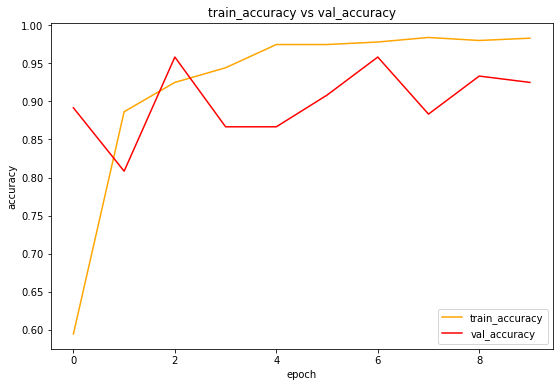

In [9]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(fit_history.history['accuracy'], color='orange')
plt.plot(fit_history.history['val_accuracy'], color='red')
plt.title('train_accuracy vs val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc=4)
plt.show()

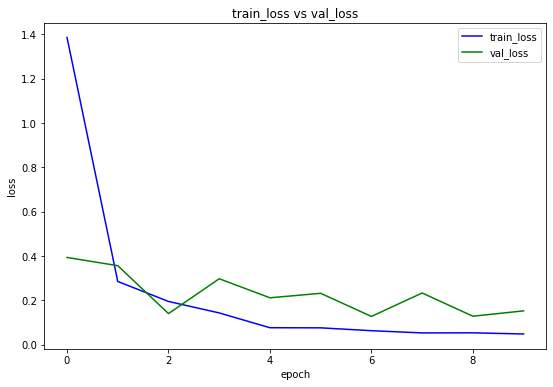

In [10]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(fit_history.history['loss'], color='blue')
plt.plot(fit_history.history['val_loss'], color='green')
plt.title('train_loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [13]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    clos =[]
for f in glob.glob(r'C:\Users\Maaher\Desktop\New folder\jpg data\Normalface\*.jpg') :
      
    # image path
    
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
           new_image = load_image(f)

    # check prediction
           pred = model.predict(new_image)
           clos.append(pred)

In [14]:
import numpy as np
clos = np.array(clos)

In [15]:
clos

array([[[0.17321305, 0.826787  ]],

       [[0.17692354, 0.8230765 ]],

       [[0.18098162, 0.81901836]],

       [[0.18843855, 0.8115614 ]],

       [[0.16637728, 0.83362275]],

       [[0.2022359 , 0.7977641 ]],

       [[0.17409515, 0.82590485]],

       [[0.1904627 , 0.80953723]],

       [[0.17672372, 0.8232763 ]],

       [[0.1744879 , 0.8255121 ]],

       [[0.17069143, 0.82930857]],

       [[0.1733216 , 0.8266784 ]],

       [[0.1919626 , 0.8080374 ]],

       [[0.17915218, 0.82084787]],

       [[0.19022022, 0.8097798 ]],

       [[0.17689066, 0.8231094 ]],

       [[0.19526985, 0.8047302 ]],

       [[0.17330591, 0.8266941 ]],

       [[0.1865187 , 0.81348133]],

       [[0.17882541, 0.82117456]],

       [[0.17391154, 0.8260885 ]],

       [[0.16674079, 0.8332592 ]],

       [[0.16820937, 0.83179057]],

       [[0.17253715, 0.82746285]],

       [[0.1634994 , 0.8365006 ]],

       [[0.1793804 , 0.8206196 ]],

       [[0.18814462, 0.8118554 ]],

       [[0.17006399, 0.82993

In [16]:
clos=np.reshape(clos, (190, 2))

In [17]:
clos

array([[0.17321305, 0.826787  ],
       [0.17692354, 0.8230765 ],
       [0.18098162, 0.81901836],
       [0.18843855, 0.8115614 ],
       [0.16637728, 0.83362275],
       [0.2022359 , 0.7977641 ],
       [0.17409515, 0.82590485],
       [0.1904627 , 0.80953723],
       [0.17672372, 0.8232763 ],
       [0.1744879 , 0.8255121 ],
       [0.17069143, 0.82930857],
       [0.1733216 , 0.8266784 ],
       [0.1919626 , 0.8080374 ],
       [0.17915218, 0.82084787],
       [0.19022022, 0.8097798 ],
       [0.17689066, 0.8231094 ],
       [0.19526985, 0.8047302 ],
       [0.17330591, 0.8266941 ],
       [0.1865187 , 0.81348133],
       [0.17882541, 0.82117456],
       [0.17391154, 0.8260885 ],
       [0.16674079, 0.8332592 ],
       [0.16820937, 0.83179057],
       [0.17253715, 0.82746285],
       [0.1634994 , 0.8365006 ],
       [0.1793804 , 0.8206196 ],
       [0.18814462, 0.8118554 ],
       [0.17006399, 0.829936  ],
       [0.18015027, 0.8198497 ],
       [0.17428425, 0.8257157 ],
       [0.

In [18]:
###CLOSE EYE FINISH

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
testing_folder = r"C:\Users\Maaher\Desktop\New folder\jpg data"
# Image size (set up the image size used for training)
img_size = 80
# Batch size (you should tune it based on your memory)
batch_size = 16

val_datagen = ImageDataGenerator(
    rescale=1. / 255)
validation_generator = val_datagen.flow_from_directory(
    testing_folder,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')

Found 308 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'C:\Users\Maaher\Desktop\New folder\jpg data',
                                target_size=(224,224),batch_size=8,class_mode='categorical')

Found 308 images belonging to 2 classes.


In [22]:
from sklearn.metrics import classification_report
y_true = validation_generator.classes

In [23]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
print(y_true.shape)

(308,)


In [42]:
mythreshold=.823338
from sklearn.metrics import confusion_matrix

y_pred = (clos[:,0]>= mythreshold).astype(int)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
from sklearn.metrics import roc_curve

y_preds = clos[:,0].ravel()

In [28]:
y_preds

array([0.17321305, 0.17692354, 0.18098162, 0.18843855, 0.16637728,
       0.2022359 , 0.17409515, 0.1904627 , 0.17672372, 0.1744879 ,
       0.17069143, 0.1733216 , 0.1919626 , 0.17915218, 0.19022022,
       0.17689066, 0.19526985, 0.17330591, 0.1865187 , 0.17882541,
       0.17391154, 0.16674079, 0.16820937, 0.17253715, 0.1634994 ,
       0.1793804 , 0.18814462, 0.17006399, 0.18015027, 0.17428425,
       0.17691156, 0.2510667 , 0.179522  , 0.17044683, 0.1861794 ,
       0.172383  , 0.17518194, 0.19177683, 0.19828378, 0.21343994,
       0.20385504, 0.18595304, 0.21332231, 0.19180577, 0.19048846,
       0.17688042, 0.17782228, 0.18398528, 0.18752377, 0.182909  ,
       0.1743879 , 0.17063516, 0.18566218, 0.17327286, 0.18998913,
       0.16735062, 0.2704442 , 0.1579338 , 0.20688806, 0.17206962,
       0.1705232 , 0.19744374, 0.19476023, 0.17999135, 0.17982462,
       0.1775317 , 0.18129109, 0.17456418, 0.16880834, 0.18206984,
       0.1663276 , 0.18310212, 0.17752802, 0.17029962, 0.17436

In [29]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    ope =[]
for f in glob.glob(r'C:\Users\Maaher\Desktop\New folder\jpg data\Strokeface\*.jpg') :
      
    # image path
    
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
           new_image = load_image(f)

    # check prediction
           pred = model.predict(new_image)
           ope.append(pred)

In [30]:
ope

[array([[0.21509217, 0.7849078 ]], dtype=float32),
 array([[0.17588528, 0.82411474]], dtype=float32),
 array([[0.20817865, 0.79182136]], dtype=float32),
 array([[0.26298422, 0.73701584]], dtype=float32),
 array([[0.18605293, 0.8139471 ]], dtype=float32),
 array([[0.17746912, 0.82253087]], dtype=float32),
 array([[0.17573197, 0.82426804]], dtype=float32),
 array([[0.19807388, 0.80192614]], dtype=float32),
 array([[0.17375067, 0.82624936]], dtype=float32),
 array([[0.18598421, 0.8140158 ]], dtype=float32),
 array([[0.18276395, 0.81723607]], dtype=float32),
 array([[0.19077827, 0.80922174]], dtype=float32),
 array([[0.17728284, 0.8227172 ]], dtype=float32),
 array([[0.16270038, 0.8372996 ]], dtype=float32),
 array([[0.1903123, 0.8096877]], dtype=float32),
 array([[0.158151, 0.841849]], dtype=float32),
 array([[0.17173322, 0.8282668 ]], dtype=float32),
 array([[0.1770102, 0.8229899]], dtype=float32),
 array([[0.16810273, 0.8318973 ]], dtype=float32),
 array([[0.17224428, 0.8277557 ]], dtyp

In [31]:
import numpy as np
ope = np.array(ope)

In [32]:
ope=np.reshape(ope, (118, 2))

In [33]:
ope

array([[0.21509217, 0.7849078 ],
       [0.17588528, 0.82411474],
       [0.20817865, 0.79182136],
       [0.26298422, 0.73701584],
       [0.18605293, 0.8139471 ],
       [0.17746912, 0.82253087],
       [0.17573197, 0.82426804],
       [0.19807388, 0.80192614],
       [0.17375067, 0.82624936],
       [0.18598421, 0.8140158 ],
       [0.18276395, 0.81723607],
       [0.19077827, 0.80922174],
       [0.17728284, 0.8227172 ],
       [0.16270038, 0.8372996 ],
       [0.1903123 , 0.8096877 ],
       [0.158151  , 0.841849  ],
       [0.17173322, 0.8282668 ],
       [0.1770102 , 0.8229899 ],
       [0.16810273, 0.8318973 ],
       [0.17224428, 0.8277557 ],
       [0.16214462, 0.8378554 ],
       [0.18273623, 0.8172638 ],
       [0.18387568, 0.8161243 ],
       [0.16580507, 0.8341949 ],
       [0.1711844 , 0.8288156 ],
       [0.19224602, 0.807754  ],
       [0.17176853, 0.82823145],
       [0.17183165, 0.82816833],
       [0.18703078, 0.8129692 ],
       [0.17221147, 0.82778853],
       [0.

In [47]:
alll=np.concatenate((clos[:,0], ope[:,1]))

In [48]:
alll

array([0.17321305, 0.17692354, 0.18098162, 0.18843855, 0.16637728,
       0.2022359 , 0.17409515, 0.1904627 , 0.17672372, 0.1744879 ,
       0.17069143, 0.1733216 , 0.1919626 , 0.17915218, 0.19022022,
       0.17689066, 0.19526985, 0.17330591, 0.1865187 , 0.17882541,
       0.17391154, 0.16674079, 0.16820937, 0.17253715, 0.1634994 ,
       0.1793804 , 0.18814462, 0.17006399, 0.18015027, 0.17428425,
       0.17691156, 0.2510667 , 0.179522  , 0.17044683, 0.1861794 ,
       0.172383  , 0.17518194, 0.19177683, 0.19828378, 0.21343994,
       0.20385504, 0.18595304, 0.21332231, 0.19180577, 0.19048846,
       0.17688042, 0.17782228, 0.18398528, 0.18752377, 0.182909  ,
       0.1743879 , 0.17063516, 0.18566218, 0.17327286, 0.18998913,
       0.16735062, 0.2704442 , 0.1579338 , 0.20688806, 0.17206962,
       0.1705232 , 0.19744374, 0.19476023, 0.17999135, 0.17982462,
       0.1775317 , 0.18129109, 0.17456418, 0.16880834, 0.18206984,
       0.1663276 , 0.18310212, 0.17752802, 0.17029962, 0.17436

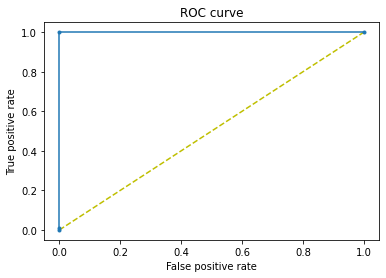

In [49]:
fpr, tpr, thresholds = roc_curve(y_true, alll)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [50]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0


In [51]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  2    0.704925
Name: thresholds, dtype: float32


In [52]:
from sklearn.metrics import confusion_matrix

mythreshold=0.704925


y_pred = (alll>= mythreshold).astype(int)
cm=confusion_matrix(y_true, y_pred)  

In [53]:
cm

array([[190,   0],
       [  1, 117]], dtype=int64)

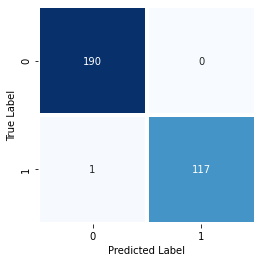

In [56]:
import seaborn as snNew
import pandas as pdNew
import matplotlib.pyplot as pltNew

array = [[190,   0],
       [  1, 117]]

DetaFrame_cm = pdNew.DataFrame(array, range(2), range(2))
snNew.heatmap(DetaFrame_cm, annot=True, cmap='Blues', cbar=False, linewidths=3, square=True, xticklabels=['0','1'], yticklabels=['0','1'], fmt='g')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
pltNew.show()

In [54]:
from sklearn.metrics import classification_report
mythreshold=0.823338


y_pred = (alll>= mythreshold).astype(int)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       190
           1       1.00      0.63      0.77       118

    accuracy                           0.86       308
   macro avg       0.91      0.81      0.83       308
weighted avg       0.88      0.86      0.85       308

